In [6]:
# Connor Lewis - CSL735
# Michael Spearin - MSS3627
# Data Science Lab - Lab 4
# Due February 14, 2017

import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy as sym
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

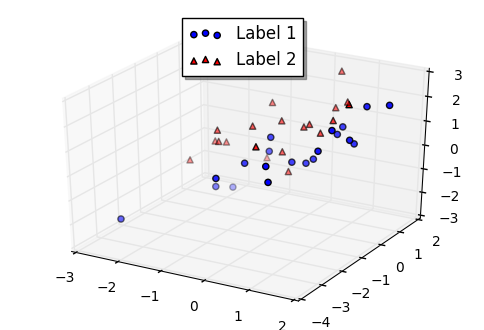

In [133]:
# Problem 1 - Linear Discriminant Analysis
# Question 1
n = 20
d = 3
mean1 = [0,0,0]
cov1 = [[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, n)

mean2 = [0, 0, 1]
cov2 = [[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, n)

sample_data = [data1, data2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:,0], data1[:,1], data1[:,2], c = 'b', marker='o', label = "Label 1")
ax.scatter(data2[:,0], data2[:,1], data2[:,2], c = 'r', marker='^', label = "Label 2")
legend = ax.legend(loc = 'upper center', shadow = True)
plt.show()

[[ 0.09744755 -0.04842389 -0.0420437 ]
 [-0.04842389  0.16610532 -0.09158889]
 [-0.0420437  -0.09158889  0.13532021]]
3
[[ 0.04367527]
 [ 0.08527587]
 [-0.1051218 ]]


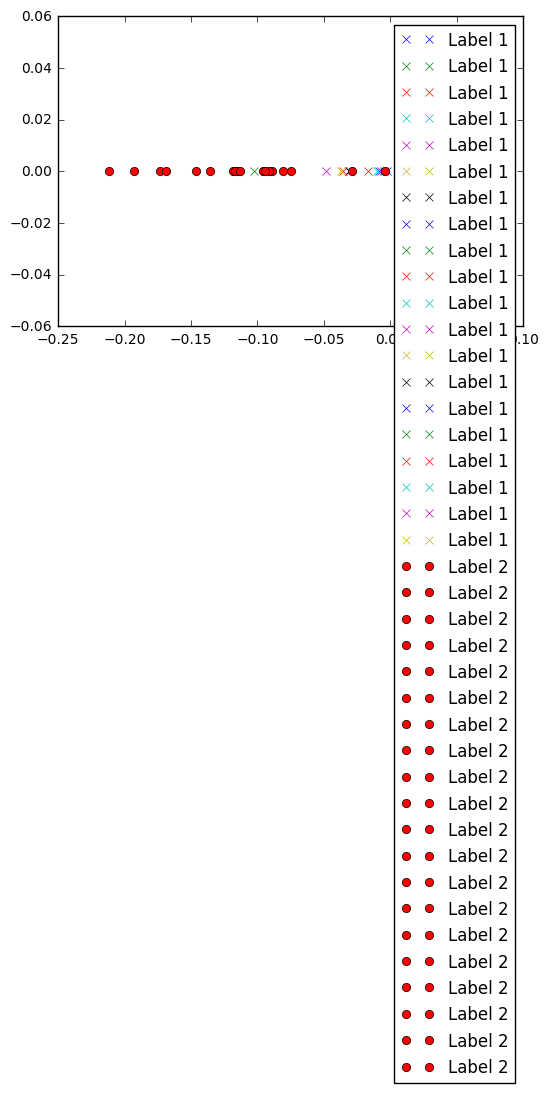

In [9]:
# Problem 1 - Linear Discriminant Analysis
# Question 2: LDA using Fisher's Linear Discriminant
#http://www.csd.uwo.ca/~olga/Courses/CS434a_541a/Lecture8.pdf
mean1 = np.matrix(np.mean(data1, axis = 0))
mean2 = np.matrix(np.mean(data2, axis = 0))
s_1 = len(data1) * np.cov(data1, rowvar = False)
s_2 = len(data2) * np.cov(data2, rowvar = False)
s_w = s_1 + s_2
print(scipy.linalg.inv(s_w))
print(np.linalg.matrix_rank(s_w)) # full rank so can use s_w^-1 * (mean1 - mean2)
mean_diff = mean1 - mean2
w = scipy.linalg.inv(s_w) * np.transpose(mean_diff)
print(w)
new_data1 = np.transpose(w) * np.transpose(data1)
new_data2 = np.transpose(w) * np.transpose(data2)
new_sampledata = [new_data1, new_data2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(new_data1, np.zeros(new_data1.shape[0]), label='Label 1', marker='x', linestyle='')
ax.plot(new_data2, np.zeros(new_data2.shape[0]), c='r', label='Label 2', marker='o', linestyle='')
ax.legend()
plt.show()

In [4]:
# Problem 1 - Linear Discriminant Analysis
    # Question 3
lda = LinearDiscriminantAnalysis()


In [131]:
# Problem 2 - Using Low Rank Structure for Corrupted Entries
corrMat1 = pd.DataFrame(pd.read_csv('./input/CorrMat1.csv', header=None))
corrMat2 = pd.DataFrame(pd.read_csv('./input/CorrMat3.csv', header=None))
corrMat1_No_Error = pd.DataFrame(pd.read_csv('./input/CorrMat1_No_Error.csv', header = None))
errorVal = 9999

def printScatters(matrix):
    r = range(len(matrix.iloc[:,0]))
    for col in r:
        plt.scatter(r, corrMat2.iloc[:,col])
        plt.show()

def rankAnalysis(matrix):
    print("The RANK of the matrix is: " + str(sym.Matrix(matrix).rank()))
    print("The RREF of the matrix is: ")
    print(sym.Matrix(matrix).rref())
        
# Analysing corrMat1
#printScatters(corrMat1)
#rankAnalysis(corrMat1)
#rankAnalysis(corrMat1_No_Error)

r = range(len(corrMat1.iloc[:,0]))
errorsFixed = 0
for row in r:
    for col in r:
        if(corrMat1.iloc[row,col] == errorVal):
            corrMat1.iloc[row,col] = corrMat1.iloc[19,col] *(corrMat1.iloc[row,19] / corrMat1.iloc[19,19])
            #print("FIXED: " + str(row) + "," + str(col) + " with " + str(corrMat1.iloc[row,col]))
            errorsFixed += 1
print("CORRMAT1: ERRORS FIXED: " + str(errorsFixed))
    
    
# Analyzing corrMat3        
#printScatters(corrMat3)
#rankAnalysis(corrMat3)
r = range(len(corrMat2.iloc[:,0]))
errorsFound = 0
errorsFixed = 0
for row in r:
    for col in range(row + 1):
        if(corrMat2.iloc[row,col] != corrMat2.iloc[col,row]):
            errorsFound += 1
            if(corrMat2.iloc[row,col] == errorVal):
                if(corrMat2.iloc[col,row] == errorVal):
                   print("ERROR: " + str(col) + "," + str(row) + " both values corrupted.")
                else:
                    corrMat2.iloc[row,col] = corrMat2.iloc[col,row]
                    errorsFixed += 1
                    #print("FIXED: " + str(row) + "," + str(col) + " replaced.")
            else:
                corrMat2.iloc[col,row] = corrMat2.iloc[row,col]
                errorsFixed += 1
                #print("FIXED: " + str(col) + "," + str(row) + " replaced.")
                
            #print("(" + str(row) + ", " + str(col) + ")")
print("CORRMAT3: Errors Found: " + str(errorsFound))
print("CORRMAT3: Errots Fixed: " + str(errorsFixed))

CORRMAT1: ERRORS FIXED: 292
CORRMAT3: Errors Found: 99
CORRMAT3: Errots Fixed: 99


In [55]:
# Problem 3 - Getting More into Kaggle
# Data PreProcessing
# Source of Code: https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
from scipy.stats import skew
from scipy.stats.stats import pearsonr
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass': 'SaleCondition']))
# Take the log of the prices to avoid skewing by value
train["SalePrice"] = np.log1p(train["SalePrice"])
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

all_data = pd.get_dummies(all_data)
all_data = all_data.fillna(all_data.mean())

X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [89]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.cross_validation import cross_val_score
# Train a Ridge Regression Model
minScore = 99999
minAlpha = 99999
for alpha in range(1,200):
    alpha =  alpha / 10.0
    model_RR = Ridge(alpha)
    crossVal_RR = np.sqrt(-cross_val_score(model_RR, X_train, y, scoring="mean_squared_error", cv = 5)).mean()
    if(crossVal_RR < minScore):
        minAlpha = alpha
        minScore = crossVal_RR
# Optimize alpha with cross validation
print("Minimum RMSE score of " + str(minScore) + " with alpha of: " + str(minAlpha))


Minimum RMSE score of 0.127337232797 with alpha of: 10.1


In [134]:
# Train a Lasso Regression Model
minScore = 99999
minAlpha = 99999
model_Best = Lasso()
for alpha in range(1,50):
    alpha =  alpha / 10000.0
    model_Lasso = Lasso(alpha).fit(X_train,y)
    crossVal_Lasso = np.sqrt(-cross_val_score(model_Lasso, X_train, y, scoring="mean_squared_error", cv = 5)).mean()
    if(crossVal_Lasso < minScore):
        minAlpha = alpha
        minScore = crossVal_Lasso
        model_Best = model_Lasso
# Optimize alpha with cross validation

print("Minimum RMSE score of " + str(minScore) + " with alpha of: " + str(minAlpha))

Minimum RMSE score of 0.12256735885 with alpha of: 0.0005


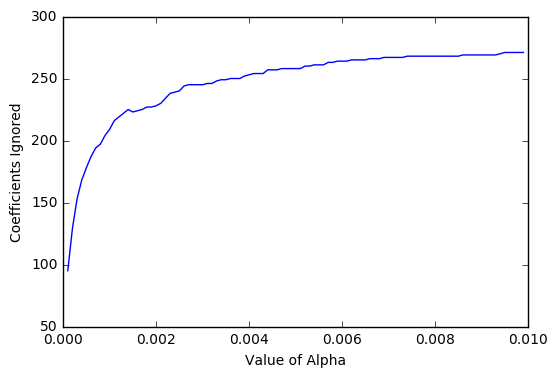

Done


In [136]:
# Plot the L0 norm, number of zeros of the coefficients that lasso produces as alpha varies
alphas = range(1,100)
for a in alphas:
    alphas[a - 1] = a / 10000.0
numZero = [None] *len(alphas)
for index in range(len(alphas)):
    alpha = alphas[index]
    model_Lasso = Lasso(alpha).fit(X_train,y)
    coefs = pd.Series(model_Lasso.coef_)
    numZero[index] = sum(coefs == 0)

plt.plot(alphas, numZero)
plt.xlabel('Value of Alpha')
plt.ylabel('Coefficients Ignored')
plt.show()
print("Done")

In [138]:
print(model_Best.values())

AttributeError: 'Lasso' object has no attribute 'values'